<a href="https://colab.research.google.com/github/ariel-j/python-learning/blob/main/Intro_to_crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cryptography Unveiled: A Python Exploration (Part I ?)

In our contemporary landscape, cryptography is omnipresent, seamlessly woven into the fabric of our digital interactions. Whether we are exchanging casual messages or transmitting sensitive personal data through the vast expanse of the internet, the assurance that our private information remains shielded is paramount.

This prompts a compelling inquiry: How can one transmit confidential information to another party without the risk of interception or unauthorized access? This question serves as the cornerstone of cryptography, a discipline dedicated to the art of encoding messages using cryptographic keys. The primary objective is to enable the recipient to decipher the message with the designated key, while thwarting any attempts at decryption by those lacking the requisite key.

In this Python notebook, we delve into the basics of cryptography, where our focus is on laying the foundation for understanding core cryptographic concepts. While we currently explore elementary techniques, the door is left ajar for delving into more advanced cryptographic realms in subsequent chapters.

---
As a preparation step, before starting our study of crytography, let's do some simlpe python imports used for easier math computation and graphing.

In [ ]:
# @title Imports
import matplotlib.pyplot as plt
import string
import math
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# The Caesar (shift) cipher

We start in ancient Roman times with the Caesar cipher, a method attributed to none other than Julius Caesar himself. In an era devoid of the internet, Caesar faced the challenge of secure communication with his military commanders. The Roman equivalent of today's internet providers involved messengers physically delivering messages, introducing the risk of interception by adversaries. To counter this threat, Caesar did the following to encrypt his messages.

The protocol is elegantly simple — each letter in the alphabet undergoes a shift of three positions. Namely, '**A**' transforms into '**D**', '**B**' into '**E**', '**C**' into '**F**', and so forth. When encountering the last three letters '**X, Y**' and '**Z**', it loops back to the beginning into '**A, B**' and '**C**', creating a circular effect.

For example, the message:
<center>

**We attack at dawn**
</center>
encrypts to
<center>

**Zh dwwdfn dw gdzq**
</center>

While appearing unintelligible to unintended recipients, decrypting is straightforward if armed with the knowledge of the cipher. Simply shift every letter down by three positions, accounting for the circular nature of the cipher.


<center>

![](https://ds055uzetaobb.cloudfront.net/brioche/uploads/pE1YAaAnIz-screen-shot-2016-06-28-at-92116-am.png)

</center>

Let's start exploring Caesar cipher using the coding wheel below. For encoding, find the letter on the outer ring and map it to the corresponding inner ring letter; for decoding, start with the inner ring and map to the corresponding outer ring letter. The code allows shifts with integers other than 3, which you can choose as input.

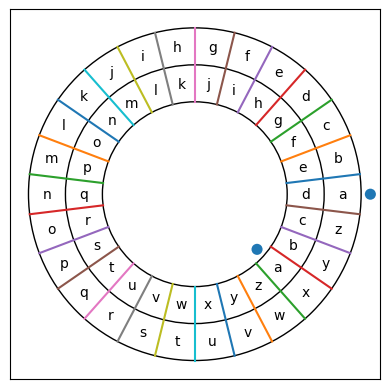

In [ ]:
# @title Ceaser cipher key { run: "auto", vertical-output: true, display-mode: "form" }
letters = list(string.ascii_lowercase)

ceaser_shift = 3 # @param {type:"integer"}
if not isinstance(ceaser_shift, int):
  ceaser_shift = 0

figure, axes = plt.subplots()

# hide axes
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

# set size
plt.xlim([-1, 1])
plt.ylim([-1, 1])
axes.set_aspect( 1 )

# draw circles
axes.add_artist( plt.Circle( (0, 0), 0.9, fill = False ) )
axes.add_artist( plt.Circle( (0, 0), 0.7, fill = False ) )
axes.add_artist( plt.Circle( (0, 0), 0.5, fill = False ) )

def from_polar(r, angle):
  return (r*math.cos(angle),r*math.sin(angle))

# draw circles near the 'a' letters
axes.add_artist( plt.Circle( (0.95, 0), 0.03, fill = True ) )
angle = 2*math.pi*(-ceaser_shift/26)
axes.add_artist( plt.Circle( from_polar(0.45, angle) , 0.03, fill = True ) )

# draw letters

for index in range(26):
  angle = 2*math.pi*index/26
  angle_half = 2*math.pi*(index/26+1/52)
  plt.plot(
      [0.5*math.cos(angle_half),0.9*math.cos(angle_half)],
      [0.5*math.sin(angle_half),0.9*math.sin(angle_half)])
  plt.text(
      *from_polar(0.8, angle), letters[index],
      horizontalalignment='center', verticalalignment='center')
  plt.text(
      *from_polar(0.6, angle), letters[(index+ceaser_shift)%26],
      horizontalalignment='center', verticalalignment='center')

plt.show()


## Implementing Ceaser shift cipher

The implementation of the Caesar cipher is remarkably straightforward. For each letter in a given message, we conceptualize it as an integer `k`, representing the distance from the letter 'A.' Consequently, '**A**', '**B**', '**C**' and '**D**' translate to 0, 1, 2, and 3, respectively, up to '**Z**', which equates to 25 (since we started counting from 0). Adding 3 to this integer yields `k+3`. However, this addition might exceed the range, resulting in numbers 26, 27, and 28. The cyclic looping mentioned earlier is then simpy taking the result modulo 26.

In summary, expressed in this new integer notation, the cipher operation is succinctly represented as:
$$ k\mapsto (k+3) \% 26. $$

The implementation below works for both lowercase and uppercase letters. Moreover, we slightly generalize it so instead of only shift by 3, we allow the shift to be any integer.

In [ ]:
# @title Ceaser shift function { run: "auto", display-mode: "form" }
def apply_ceaser_shift(message: str, shift: int):
  encrypted_message = []
  ord_a = ord('a')
  ord_A = ord('A')
  for c in message:
    ord_char = ord(c)-ord_a
    ord_CHAR = ord(c)-ord_A
    if 0<=ord_char<26:    # For lower case letters
      ord_char += shift
      ord_char %= 26
      encrypted_message.append(chr(ord_a+ord_char))
    elif 0<=ord_CHAR<26:  # For upper case letters
      ord_CHAR += shift
      ord_CHAR %= 26
      encrypted_message.append(chr(ord_A+ord_CHAR))
    else:                 # If not lower or upper case, keep the same character
      encrypted_message.append(c)
  return ''.join(encrypted_message)

Now, to code the message just run
> `apply_ceaser_shift(message, 3)`

and to decode a message run
> `apply_ceaser_shift(coded_message, -3)`

In [ ]:
# @title Ceaser cypher encryption { run: "auto", vertical-output: true, display-mode: "form" }
message_to_encrypt = "cyclic groups are the building blocks of finite groups" # @param {type:"string"}

print(f'Encrypted message: {apply_ceaser_shift(message_to_encrypt, ceaser_shift)}')

Encrypted message: fbfolf jurxsv duh wkh exloglqj eorfnv ri ilqlwh jurxsv


In [ ]:
# @title Ceaser cypher decryition { run: "auto", vertical-output: true, display-mode: "form" }
message_to_decrypt = "fbfolf jurxsv duh wkh exloglqj eorfnv ri ilqlwh jurxsv" # @param {type:"string"}

print(f'Decrypted message: {apply_ceaser_shift(message_to_decrypt, -ceaser_shift)}')

Decrypted message: cyclic groups are the building blocks of finite groups


## Breaking the cipher

Upon intercepting the coded message, the enemy might initially perceive it as inconsequential. However, once acquainted with the Caesar cipher, decoding becomes remarkably easy, akin to the intended recipient's experience. To increase the complexity for cracking the message, Caesar could change the shift amount rather than adhering to a fixed shift of 3 (although he needs to inform his commanders about this). This means that even if the enemy knows about the shift cipher, which we call the protocol, they still must ascertain the specific shift amount, which we think of as the key to the cipher.

In this straightforward cipher, the shift can range from 0 (equivalent to sending the message without encoding) up to 25. Shifting by larger numbers yields no new information; for instance, shifting by $29 = 26 + 3$ is indistinguishable from shifting by 3.

Despite this, the enemy could still break the cipher by exhaustively testing all 26 possibilities. A bit time consuming, but not too much. However, modern computers can swiftly explore all possibilities within a fraction of a second, necessitating the exploration of more robust cryptographic protocols to withstand modern computational capabilities.

# Letter substitution cipher

The Caesar cipher, while simple, has a limitation: it offers only 26 possible shifts. Alternatively, knowing even a single letter from the original message, we can find the key and decode the whole message. How can we make breaking the code much harder?

What if we ditched the rigid, sequential shifts of the Caesar cipher and embraced a more flexible approach? Imagine a cipher where each letter of the alphabet could be substituted with any other letter. For instance, let's take a simplified example with only the letters '**A-H**' and a custom mixing table:

<center>

| A | B | C | D | E | F | G | H |
|---|---|---|---|---|---|---|---|
| G | F | B | C | E | A | H | D |

</center>

In this case
<center>

`beach bag`

</center>
encrypts to
<center>

`fegbd fgh`
</center>

Suddenly, there's a multitude of possible combinations, far exceeding the 26 of the Caesar cipher's. While the key may not be as straightforward as a single integer shift, it remains simple enough to encode and decode messages. But just how much more secure is this approach, and how challenging would it be to crack it?

## The protocol

In this encryption, each letter from the top line int the table above is mapped to a unique letter on the bottom line. Decryption, conversely, reverses this process, from the bottom line to the top. In particular, this means that every letter of the alphabet must appear precisely once on the bottom line.

More formally, if our alphabet is $\Omega=\{\text{a,b,c,}\cdots,\text{z}\}$, then the encryption is a one to one and onto function $\varphi:\Omega \to \Omega$. Such a function always has an inverse, namely $\varphi^{-1}:\Omega\to\Omega$ such that $\varphi^{-1}(\varphi(c))=c$ for each letter $c$. This inverse is precisely the function used to decode the coded message. Such functions are called permutations of a set, and we call this protocol a **permutation protocol**.

## Number of functions

While the Caesar cipher had a mere 26 possible shifts, the permutation protocol offers an astronomical number of potential functions. To illustrate, there are already 26 choices just for the mapping of the letter '**a**'. Once '**a**' is assigned, there remain 25 options for '**b**', as it cannot duplicate '**a**'. Continuing this pattern, '**c**' has 24 possibilities, '**d**' has 23, and so forth. Multiplying these together, we arrive at $26!\sim 4 \times 10^{26}$ possible functions. This vast number renders brute-force decryption unfeasible; even if we could test a million functions per second, it would take around $10^{13}$ years to exhaust all possibilities!

<center>

| A | B | C | D | E | ... |
|---|---|---|---|---|---|
| 26 | 25 | 24 | 23 | 22 | ... |

</center>

Is there another approach to crack the code within a timeframe feasible in our lifetime (or even in mere seconds)? Surprisingly, there is. But before delving into it, let's delve into some coding exercises.

## Implementing the letter substitution cipher



### Implementing permutations

The initial step involves implementing a permutation function. Aside from the user interface for input, the critical aspect lies in validating whether the provided function constitutes a valid permutation. This validation is conducted by attempting to compute the inverse function as outlined below:
1. Iterate through all **key->value** pairs in the function.
2. If the **value** is not a letter, then the image of $\varphi$ fallse outside the alphabet $\{a,b,c,...,z\}$, thus invalidating it as a permutation.
3. If the **value** is a letter, but there was already a previous key pointing to the same letter, e.g. $a\mapsto v$ and $c\mapsto v$, then our function is not one to one, and therefore doesn't have an inverse.
4. Otherwise, in the inverse function we have that **value->key**.

Note that (2) establishes that $\varphi(\Omega)\subseteq \Omega$, and (3) confirms that $\varphi$ is one to one. Since $\Omega$ is finite, it means that $\varphi$ is also onto, and therefore it actually has an inverse, which is computed in (4).

In [ ]:
# @title Choose the Permutation key { display-mode: "form" }

# ----------------- permutation -----------------

permutation_string = 'klyaotghcmwxjbquzivdsefnpr'
permutation_key = {letter: permutation_string[ord(letter)-ord('a')] for letter in letters}
permutation_inverse = {value: key for key, value in permutation_key.items()}

def find_inverse_permutation():
  # Tries to compute the inverse of the given permutation, and returns it
  # if there isn't such, raise an exception
  inverse = {}
  for key, value in permutation_key.items():
    if value not in letters:
      raise Exception(f'The letter \'{key}\' points to a non letter \'{value}\'')
    if value in inverse:
      raise Exception(f'Both \'{key}\' and \'{inverse[value]}\' point to \'{value}\'')
    inverse[value] = key
  return inverse

# ----------------- user interface -----------------

def letter_change_event(letter: str):
  def on_letter_change(change):
    global permutation_key
    permutation_key[letter] = change["new"]
    validate_permutation()
  return on_letter_change

def letter_box(letter: str):
  label = widgets.Label(value=" .  "+letter)
  text = widgets.Text(value=permutation_key[letter])
  text.layout.width = '30px'
  text.observe(letter_change_event(letter), names='value')
  return widgets.VBox([label, text])

letter_boxes=[letter_box(letter) for letter in letters]
permutation_message = widgets.Label(value="Permutation is fine")


def validate_permutation():
  global permutation_inverse
  try:
      permutation_inverse = find_inverse_permutation()
      permutation_message.value = "Permutation is fine"
  except Exception as e:
    permutation_message.value = str(e)

validate_permutation()

# Create the table
display(widgets.VBox(children=[widgets.HBox(letter_boxes), permutation_message]))


### Coding and decoding

Once we have the permutation and its inverse as functions, coding and decoding is simply applying the functions on each letter.

As before, we implement the coding\decoding process so that characters not in the alphabet remain the same.

In [ ]:
# @title Permutation encryption { run: "auto", display-mode: "form" }

message = "permutation groups are much better" # @param {type:"string"}

print(f'The coded message is:')
print(''.join([permutation_key.get(c, c) for c in message]))


The coded message is:
uoijsdkdcqb giqsuv kio jsyh loddoi


In [ ]:
# @title Permutation decryption { run: "auto", display-mode: "form" }

message = "uoijsdkdcqb giqsuv kio jsyh loddoi" # @param {type:"string"}


print(f'The original message is:')
print(''.join([permutation_inverse.get(c, c) for c in message]))


The original message is:
permutation groups are much better


## Craking the protocol

Breaking this cipher presents a formidable challenge due to its $26!$ possible keys. Moreover, while spaces between words were retained in the example messages above, in practice, these spaces can be removed. Although this may slightly complicate readability after decoding, it substantially bolsters the code's resilience against decryption attempts.

Before attempting to crack this cipher, here's a challenge for you: decrypt a message with partial key knowledge (including spaces) and uncover the original message. As you tackle this challenge, consider strategies that could aid in decrypting a code without spaces.

In [ ]:
# @title Craking the code challange { run: "auto", display-mode: "form" }
import re

cracking_permutation_string = '??gkmfdw???u?qby?zlcpj??vx'
cracking_permutation_key = {letter: cracking_permutation_string[ord(letter)-ord('a')] for letter in letters}

def cracking_letter_change_event(letter: str):
  def on_letter_change(change):
    cracking_permutation_key[letter] = change["new"]
    decoded_message.value = 'Decoded message: '+partial_decode()
  return on_letter_change

def cracking_letter_box(letter: str):
  label = widgets.Label(value=" .  "+letter)
  text = widgets.Text(value=cracking_permutation_key[letter])
  text.layout.width = '30px'
  text.observe(cracking_letter_change_event(letter), names='value')
  return widgets.VBox([label, text])

coded_message = '''jmk xlb hax xmibibc qb jmk xka,
xmibibc hijm ass mix eicmj:
mk gig mix ykwp okxj jq eadk
jmk oissqhx xeqqjm abg owicmj
abg jmix hax qgg, oktalxk ij hax
jmk eiggsk qf jmk bicmj'''

def partial_decode():
  return ''.join([cracking_permutation_key.get(c, c) for c in coded_message])


cracking_letter_boxes=[cracking_letter_box(letter) for letter in letters]
cracking_message = widgets.HTML(value=re.sub('\n','<br>',f'<b>Coded message: \n{coded_message}'))
decoded_message = widgets.HTML(value=re.sub('\n','<br>',f'<b>Decoded message: \n{partial_decode()}'))

# Create the table
display(widgets.VBox(children=[
    widgets.HBox(cracking_letter_boxes),
    widgets.HBox([cracking_message, widgets.Label('------->'), decoded_message])]))

So how can we break the code when there are $26!$ possible combinations?

Well, in attempting the challenge above, you likely noticed some clues. For instance, there are frequent occurrences of the word '**the**', common in sentence construction. By guessing some of these words and assessing if the rest of the decoded message seems "plausible", we often led to the full solution.

But what if the encoder doesn't include these helpful spaces between words? Break the code becomes trickier, yet a similar principle applies.

Consider the expectation that the original message will contain the word '**the**' numerous times. Although we don't know which three characters represent these three-letter words, we can anticipate the letters '**t**', '**h**', and '**e**' will appear frequently. Thus, by examining the coded message and identifying the most common letters, we can hypothesize they represent one of these three.

In essence, our human language structure inherently contains patterns, irrespective of text content, which we can leverage to decode the message.



### Using statistics

Let's formalize this idea.

For each letter '**c**' we can count how many times in appears in a message '**msg**', and denote it by $\text{msg}_{\#c}$. The more popular a letter is, the higher this number will be. Of course, longer messages have higher such frequencies, so we will usually normalize them by dividing by the length $|\text{msg}|$ of the message:
$$\frac{\text{msg}_{\#c}}{|\text{msg}|}.$$

We can now compute these statistics for our coded message to gauge the letter popularity. Similarly, we can analyse sufficiently lengthy text using the same process. Once we have both of these statistics, the guessing game start. Identify the most popular letter in the coded message and "guess" that it corresponds to one of the most popular letters in the standard text.

For example, let's start by computing the [statistics of one such long text](https://en.wikipedia.org/wiki/Letter_frequency):


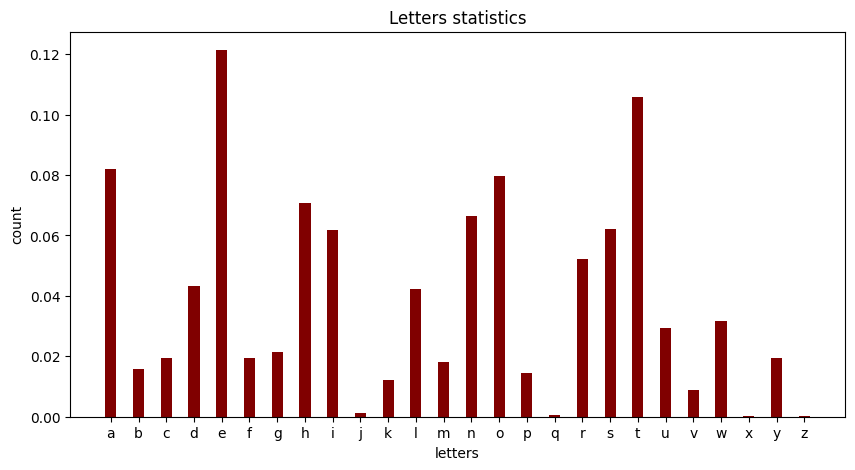

In [ ]:
# @title Statistics extractor - standard text { run: "auto", display-mode: "form" }
text_example = "Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversation?'  So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.  There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, 'Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and then hurried on, Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the field after it, and fortunately was just in time to see it pop down a large rabbit-hole under the hedge.  In another moment down went Alice after it, never once considering how in the world she was to get out again.  The rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down, so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well.  Either the well was very deep, or she fell very slowly, for she had plenty of time as she went down to look about her and to wonder what was going to happen next. First, she tried to look down and make out what she was coming to, but it was too dark to see anything; then she looked at the sides of the well, and noticed that they were filled with cupboards and book-shelves; here and there she saw maps and pictures hung upon pegs. She took down a jar from one of the shelves as she passed; it was labelled 'ORANGE MARMALADE', but to her great disappointment it was empty: she did not like to drop the jar for fear of killing somebody, so managed to put it into one of the cupboards as she fell past it.  'Well!' thought Alice to herself, 'after such a fall as this, I shall think nothing of tumbling down stairs! How brave they'll all think me at home! Why, I wouldn't say anything about it, even if I fell off the top of the house!' (Which was very likely true.)  Down, down, down. Would the fall never come to an end! 'I wonder how many miles I've fallen by this time?' she said aloud. 'I must be getting somewhere near the centre of the earth. Let me see: that would be four thousand miles down, I think - ' (for, you see, Alice had learnt several things of this sort in her lessons in the schoolroom, and though this was not a very good opportunity for showing off her knowledge, as there was no one to listen to her, still it was good practice to say it over) ' - yes, that's about the right distance - but then I wonder what Latitude or Longitude I've got to?' (Alice had no idea what Latitude was, or Longitude either, but thought they were nice grand words to say.)  Presently she began again. 'I wonder if I shall fall right through the earth! How funny it'll seem to come out among the people that walk with their heads downward! The Antipathies, I think - ' (she was rather glad there was no one listening, this time, as it didn't sound at all the right word) ' - but I shall have to ask them what the name of the country is, you know. Please, Ma'am, is this New Zealand or Australia?' (and she tried to curtsey as she spoke - fancy curtseying as you're falling through the air! Do you think you could manage it?) 'And what an ignorant little girl she'll think me for asking! No, it'll never do to ask: perhaps I shall see it written up somewhere.'  Down, down, down. There was nothing else to do, so Alice soon began talking again. 'Dinah'll miss me very much to-night, I should think!' (Dinah was the cat.) 'I hope they'll remember her saucer of milk at tea-time. Dinah my dear! I wish you were down here with me! There are no mice in the air, I'm afraid, but you might catch a bat, and that's very like a mouse, you know. But do cats eat bats, I wonder?' And here Alice began to get rather sleepy, and went on saying to herself, in a dreamy sort of way, 'Do cats eat bats? Do cats eat bats?' and sometimes, 'Do bats eat cats?' for, you see, as she couldn't answer either question, it didn't much matter which way she put it. She felt that she was dozing off, and had just begun to dream that she was walking hand in hand with Dinah, and saying to her very earnestly, 'Now, Dinah, tell me the truth: did you ever eat a bat?' when suddenly, thump! thump! down she came upon a heap of sticks and dry leaves, and the fall was over." # @param {type:"string"}

def count_letters_in(s: str, normalized: bool = False):
  letters_count = {c:0 for c in letters}

  char_count = 0
  for c in s:
    if c in letters_count:
      letters_count[c] += 1
      char_count += 1

  if normalized:
    for c in letters_count:
      letters_count[c] /= char_count

  return letters_count

letters_count = count_letters_in(text_example, normalized=True)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(letters_count.keys(), letters_count.values(), color ='maroon',
        width = 0.4)

plt.xlabel("letters")
plt.ylabel("count")
plt.title("Letters statistics")
plt.show()


Looking at these statistics, we see that the most common letters by order are **e, t, a, o**.

Now, let's do that same for our coded message:

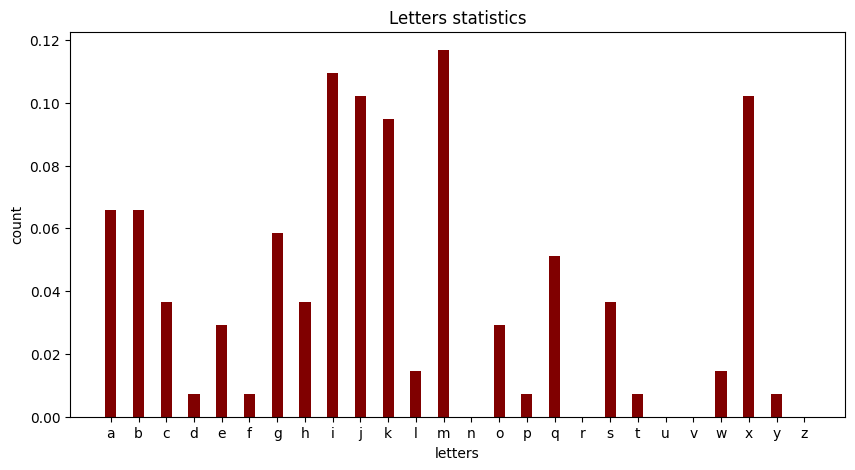

In [ ]:
# @title Statistics extractor - coded message { run: "auto", display-mode: "form" }
coded_text_example = "jmk xlb hax xmibibc qb jmk xka, xmibibc hijm ass mix eicmj: mk gig mix ykwp okxj jq eadk jmk oissqhx xeqqjm abg owicmj abg jmix hax qgg, oktalxk ij hax jmk eiggsk qf jmk bicmj" # @param {type:"string"}

letters_count = count_letters_in(coded_text_example, normalized=True)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(letters_count.keys(), letters_count.values(), color ='maroon',
        width = 0.4)

plt.xlabel("letters")
plt.ylabel("count")
plt.title("Letters statistics")
plt.show()


This time, the four most popular letters are **m,i,j,x**. It doesn't means that they correspond to **e,t,a,o** from before, but it is not too far off.

To get a much more visual comparrison, let's put both of the statistics together:

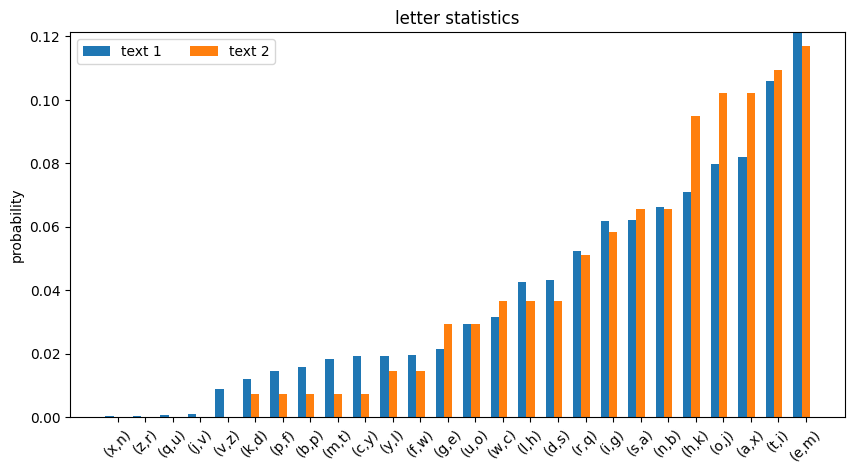

In [ ]:
# @title Statistics comparison { display-mode: "form" }
text_1 = "Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversation?'  So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.  There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, 'Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and then hurried on, Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the field after it, and fortunately was just in time to see it pop down a large rabbit-hole under the hedge.  In another moment down went Alice after it, never once considering how in the world she was to get out again.  The rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down, so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well.  Either the well was very deep, or she fell very slowly, for she had plenty of time as she went down to look about her and to wonder what was going to happen next. First, she tried to look down and make out what she was coming to, but it was too dark to see anything; then she looked at the sides of the well, and noticed that they were filled with cupboards and book-shelves; here and there she saw maps and pictures hung upon pegs. She took down a jar from one of the shelves as she passed; it was labelled 'ORANGE MARMALADE', but to her great disappointment it was empty: she did not like to drop the jar for fear of killing somebody, so managed to put it into one of the cupboards as she fell past it.  'Well!' thought Alice to herself, 'after such a fall as this, I shall think nothing of tumbling down stairs! How brave they'll all think me at home! Why, I wouldn't say anything about it, even if I fell off the top of the house!' (Which was very likely true.)  Down, down, down. Would the fall never come to an end! 'I wonder how many miles I've fallen by this time?' she said aloud. 'I must be getting somewhere near the centre of the earth. Let me see: that would be four thousand miles down, I think - ' (for, you see, Alice had learnt several things of this sort in her lessons in the schoolroom, and though this was not a very good opportunity for showing off her knowledge, as there was no one to listen to her, still it was good practice to say it over) ' - yes, that's about the right distance - but then I wonder what Latitude or Longitude I've got to?' (Alice had no idea what Latitude was, or Longitude either, but thought they were nice grand words to say.)  Presently she began again. 'I wonder if I shall fall right through the earth! How funny it'll seem to come out among the people that walk with their heads downward! The Antipathies, I think - ' (she was rather glad there was no one listening, this time, as it didn't sound at all the right word) ' - but I shall have to ask them what the name of the country is, you know. Please, Ma'am, is this New Zealand or Australia?' (and she tried to curtsey as she spoke - fancy curtseying as you're falling through the air! Do you think you could manage it?) 'And what an ignorant little girl she'll think me for asking! No, it'll never do to ask: perhaps I shall see it written up somewhere.'  Down, down, down. There was nothing else to do, so Alice soon began talking again. 'Dinah'll miss me very much to-night, I should think!' (Dinah was the cat.) 'I hope they'll remember her saucer of milk at tea-time. Dinah my dear! I wish you were down here with me! There are no mice in the air, I'm afraid, but you might catch a bat, and that's very like a mouse, you know. But do cats eat bats, I wonder?' And here Alice began to get rather sleepy, and went on saying to herself, in a dreamy sort of way, 'Do cats eat bats? Do cats eat bats?' and sometimes, 'Do bats eat cats?' for, you see, as she couldn't answer either question, it didn't much matter which way she put it. She felt that she was dozing off, and had just begun to dream that she was walking hand in hand with Dinah, and saying to her very earnestly, 'Now, Dinah, tell me the truth: did you ever eat a bat?' when suddenly, thump! thump! down she came upon a heap of sticks and dry leaves, and the fall was over." # @param {type:"string"}
text_2 = "jmk xlb hax xmibibc qb jmk xka, xmibibc hijm ass mix eicmj: mk gig mix ykwp okxj jq eadk jmk oissqhx xeqqjm abg owicmj abg jmix hax qgg, oktalxk ij hax jmk eiggsk qf jmk bicmj" # @param {type:"string"}

texts = [text_1, text_2]

def ordered_stats(s: str):
  text_stats = count_letters_in(s, normalized=True)
  list_stats = [(c, count) for c, count in text_stats.items()]
  return sorted(list_stats, key=lambda item: item[1])

# Extract the statistics of the texts, and then order the letters
# by their number of appearances.

stats_1 = ordered_stats(text_1)
stats_2 = ordered_stats(text_2)

fig, ax = plt.subplots(figsize = (10, 5))

x = np.arange(len(letters))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

rects = ax.bar(
    x+0*width, [count for _,count in stats_1], width, label= f'text 1')
rects = ax.bar(
    x+1*width, [count for _,count in stats_2], width, label= f'text 2')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('probability')
ax.set_title('letter statistics')
ax.set_xticks(
    x + width, [f'({c1},{c2})' for (c1,_),(c2,_) in zip(stats_1,stats_2)],
    rotation=45)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, max(stats_1[-1][1], stats_2[-1][1]))

plt.show()



Let's assess the correspondence between the coded message and English letter frequencies.

The most frequently occurring letter in our coded message is '**m**'. While it doesn't mapped to the most common English letter '**e**', it does correspond to '**h**' which ranks 5th. So it is not the first guess, but not too far off. Also, since our coded message is quite short, the first 5 popular letter have nearby probabilities, so it is not too surprising. As the coded message becomes longer and longer, the correspondance will be tighter.

How about the next four popular letters '**i,x,j,k**' in our coded message? They decode to '**i,s,t,e**' which rank 8, 7, 2, 1 in English respectively, and are not too far off either. If we guessed that the first 5 letters would be mapped to one of the first 15 most popular letters in English, then we could check $15*14*13*12*11=360360$ possibilities, which is quite feasible for the computer. Subsequently, we can select the most plausible choice. Typically, once we decode the most popular letters, deciphering the remainder becomes straightforward.

It's worth noting that even if we used the top 10 most popular letters, it would have succeeded this time. Moreover, as the coded message lengthens, guessing becomes increasingly easier.

## Conclusion for permutation chiper

In contrast to the shift (Caesar) cipher, the permutation cipher presents a vast array of possible keys, rendering brute-force attempts to crack it impractical. Moreover, with the key in hand, both encoding and decoding messages remain straightforward.

However, our everyday language contains inherent patterns that remain discernible despite letter substitutions, and basic letter statistics offer valuable clues for identifying potential keys. This analysis can be further enhanced by examining two-letter patterns (for example, the common occurrence of '**th**' compared to '**ah**') and even longer sequences. Moreover, longer coded messages provide more robust statistical insights.

Given these considerations, can we still devise protocols that resist easy hacking?

# Vigenère cipher

The fundamental flaw leading to code breaking in the previous section was the independent encoding of different letters in the message using the same scheme.If, for instance, an '**a**' became '**u**' once, then every '**a**' in the message was encoded into '**u**'.

Looking to create a stronger encryption protocol, led the 16th century's Giovan Battista Bellaso to invent a new type of encryption where the letter substitution depends not only on the letter itself, but also its position in the message. Only about 300 years later in the 19th century this encoding protocol was broken. Interestingly, these 19th century people missatrribute this protocol to Blaise de Vigenère (also from the 16th century), which how this protocol [got its name](https://en.wikipedia.org/wiki/Vigen%C3%A8re_cipher).

> **Remark**: More generally, this type of letter substitution codes are called [Polyalphabetic ciphers](https://en.wikipedia.org/wiki/Polyalphabetic_cipher), and our recurring mathematician Lewis Carroll even [once wrote](https://en.wikipedia.org/wiki/The_Alphabet_Cipher) about this Vigenère cipher.


## The protocol

To begin, condier the simple $k$-shift Caesar cipher, which we can brute-force by testing all 26 possibilities. However, leveraging the statistics method from the previous section, allows us to narrow down the potential keys: Identify the most popular letter in the coded message, guess that it should map to one of the most popular letters in English (like '**e,t,a,o**'), and check the corresponding keys.

However, what happens if we take two shifts by $k_1$ and $k_2$ alternating between the odd and even positions in the message? For example, for $k_1=2$ and $k_2=4$ we get the encoding:

<center>

|T|w|e|e|d|l|e|d|u|m| |a|n|d| |T|w|e|e|d|l|e|d|e|e|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|V|a|g|i|f|p|g|h|w|q| |e|p|h| |X|y|i|g|h|n|i|f|i|g|

</center>

Although both 'Tweedledum' and 'Tweedledee' begin with '**T**', the first one is mapped to '**V**' while the second to '**X**'. Similarly, the many '**e**'s in both names are mapped to both '**g**' and '**i**'. Suddenly the statistics is split up to "two" statistics which are then intermixed back together.

Breaking this code by brute force is still possible, since there are only $26^2=676$ possibilities, but this complexity can be increased easily by adding more than just 2 types of shits.

More formally, in this protocol you choose some $N$, then select $N$ shift amounts $k_0, k_1,..., k_{19}$, and in the encoding the $i$-th letter is shifted by $k_{(i\%N)}$.

The standard statistics method is no longer effective, and there are $26^N$ possible keys which can be a lot. Already for $N=20$ we have that $26^{19}>26!$.

Can you devise a strategy to crack this code?

## Breaking the chiper

The first to break the chiper publicly was Friedrich Kasiski in 1863, though privately a similar method was found a decade earlier by the mathematician [Charles Babbage](https://en.wikipedia.org/wiki/Charles_Babbage) who is considered by many as one of the people who originated the concept of a digital programmable computer, and is sometimes called "The father of the comuter".

The key idea needed, is to determine the value of $N$, after which we can apply the statistics method but on letters at positions $d+kN$ for $d$ fixed and $k=1,2,3,...$ . For example, in our "Tweedldum and Tweedledee" message, we can separately analyze the statistics of the even and odd positions.

Using modern comuters, we can iterate through all possible $N$ (assuming it is not "too" large, which we will discuss about soon), and identify those producing statistics consistent with the English language. But what could we have done in the 19th century, or alternatively without a computer at our disposal?

Kasiski's insight was to again to exploit the inheret structure of the English language. More specifically, there are words that are used frequently enough, and if the distance between them is a multiple of $N$, then they will be encoded to the same word.

For instance, consider the encoding:

t|h|e| |l|i|o|n| |a|n|d| |t|h|e| |u|n|i|c|o|r|n| |w|e|r|e| |f|i|g|h|t|i|n|g| |f|o|r| |t|h|e| |c|r|o|w|n
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
k|h|f| |t|g|f|n| |b|v|b| |t|i|f| |s|e|i|d|p|z|l| |w|f|s|m| |w|i|h|i|b|g|e|g| |g|w|p| |t|i|f| |a|i|o|x|o

The word '**the**' appears three times this example. At first, it is encoded to '**khf**', and next to '**tif**'. However, in the third time it is mapped again to '**tif**'! If we only see the encoded message, and guess that both of these '**tif**' words came from the same original word, then the length of the key word, must divide the distance between them.

More specifically, the distance between them (from the beginning of the first '**tif**' until the beginning of the second '**tif**) is 30, so that $N \mid 30$ and therefore is one of $1,2,3,5,6,10,15,30$. When the coded message is much longer, we can usually find many more such patterns, and use them do guess more accurately the value of $N$.


# What is next?

We've explored a bit the challenge of secure communication, aiming to prevent unintended interception.

We began with the simple Caesar shift chiper, which is effective against adversaries unfamiliar with encryption but vulnerable due to its limited 26 key space.

Moving to permutation chipher, there are so many possible keys rendering brute-force attacks impractical. However, realizing that human languages contain a lot of structure was utilized to find a statistics method to break this code also. Finally, substituting letter based on their value and position, made the code stronger, but still breakable.

> So is there an "unbreakable" code?

The answer is **YES**. In the Vigenère cipher, with key length at least the length of the messagee, the periodicity in the encoding is gone, and therefore it cannot really be broken. However, there are two significant problems with this solution:

1. Both parties, the encoder and decoder, must possess the key in advance. This might be possible if both met before hand and shared the key, but is quite complicate if this is the first communication for online stranger from two remote corners of the world.
2. If an attacker gains access to both encoded and original message in some way (e.g. bribing or stealing), then in all the protocols we described here, they can also deduce the key. This means that they can now break ALL the coded messages encoded by that key (future and past).

These hurdles, especially pertinent in today's global communications landscape, require more robust solutions. Enter private/public key schemes, leveraging mathematics to ensure even with knowledge of the encryption process (public key), decoding remains elusive without the private key. This and more will be explored in the next installment of these notes.